# Group 87 Final report - Predicting Reason for Absence at Work

## Introduction

Absenteeism refers to the habitual non-presence of an employee at their job. Absence turns into absenteeism when an employee is absent from work for lengths beyond what is considered an acceptable time span (Absenteeism, 2022; Kenton, 2022). People miss work for various reasons such as health issues, familial commitments, etc.

Employee absenteeism becomes a problem for companies as it can result in lowered productivity, increased costs, and employee burnout. If an employee is regularly absent, they contribute less to the company leading to decreased productivity. However, the company is still bearing the cost of hiring this employee, who is often eligible for paid leaves. The work that the absent employee misses has to be done by another employee, which can lead to employee burnout for the latter. 

The dataset “Absenteeism at Work” was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil. It was donated to the UCI Machine Learning Repository, which is our source for the dataset (UCI Machine Learning Repository, n.d.). The data consists of 740 rows and 21 columns. A total of 28 reasons for absences are documented (**See appendix**), each represented by an integer from 1 to 28. A reason represented by 0 means “other reason”. We chose the top 10 most common reasons (mostly medical reasons like illnesses, medical consultation) to be predicted since many reasons like death and blood donation are less common in the dataset. 

At first, we thought age and BMI are good predictors. But after preliminary data analysis, age and BMI don’t have much impact. Therefore, in this project, we aim to predict the reason for absence using a classification model based on the two predictors: distance from residence to work and number of absent time in hours



## Methods and Results 

We start by loading necessary packages.

### Loading the necessary libraries

In [1]:
library(tidyverse)
library(tidymodels)
library(cowplot)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Loading data

We then load the absenteeism dataset from the following url. We use make.names() to ensure column names are not separated by spaces, but by periods.

In [2]:
data <- read_csv2(url("https://raw.githubusercontent.com/tim13246879/dsci-100-2022w1-group-87/main/Absenteeism_at_work.csv"))
colnames(data) <- make.names(colnames(data))
data

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 740 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (20): ID, Reason for absence, Month of absence, Day of the week, Seasons...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,⋯,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,26,7,3,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239554,⋯,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239554,⋯,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,2
3,23,7,6,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
10,22,7,6,1,361,52,3,28,239554,⋯,0,1,1,1,0,4,80,172,27,8
20,23,7,6,1,260,50,11,36,239554,⋯,0,1,4,1,0,0,65,168,23,4
14,19,7,2,1,155,12,14,34,239554,⋯,0,1,2,1,0,0,95,196,25,40


Table 1: Original absenteeism dataset. 

### Wrangling data

We wrangle the data by removing all 0s (which means "other reason") in the "reasons for absence" column of our original dataset, since we are not interested in predicting a reason that is unknown. As mentioned in the introduction, we then find the top 10 absent reasons using group_by() and summarize().

In [3]:
top_10_reasons <- data |>
    group_by(Reason.for.absence)|>
    summarize(frequency = n()) |>
    filter(Reason.for.absence != "0") |>
    arrange(desc(frequency)) |>
    slice(1:10)
top_10_reasons

Reason.for.absence,frequency
<dbl>,<int>
23,149
28,112
27,69
13,55
19,40
22,38
26,33
25,31
11,26


Table 2: Frequency of the top 10 reasons for absence 

Since we only aim to predict the top 10 reasons (23, 28, 27, 13, 19, 22, 26, 25, 11, and 10), we only want these reasons in the data set. So using information from table 2 above, we filter out the top 10 reasons of absence from the original data set. We also convert the Reason.for.absence column to a factor as each of the numbers represent a reason. We will select the top 6 rows for this table. 

Note that classes are imbalanced (reason 23 has around 6 times the frequency of reason 10). 

In [4]:
data <- data |> 
    filter(Reason.for.absence %in% c("23","28","27","13","19","22","26","25","11","10")) |>
    mutate(across(Reason.for.absence, as.factor))
head(data)

ID,Reason.for.absence,Month.of.absence,Day.of.the.week,Seasons,Transportation.expense,Distance.from.Residence.to.Work,Service.time,Age,Work.load.Average.day,⋯,Disciplinary.failure,Education,Son,Social.drinker,Social.smoker,Pet,Weight,Height,Body.mass.index,Absenteeism.time.in.hours
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,26,7,3,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,4
3,23,7,4,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
11,23,7,5,1,289,36,13,33,239554,⋯,0,1,2,1,0,1,90,172,30,2
3,23,7,6,1,179,51,18,38,239554,⋯,0,1,0,1,0,0,89,170,31,2
10,22,7,6,1,361,52,3,28,239554,⋯,0,1,1,1,0,4,80,172,27,8
20,23,7,6,1,260,50,11,36,239554,⋯,0,1,4,1,0,0,65,168,23,4


Table 3: First 6 rows of filtered absenteeism dataset 

The top 6 rows are chosen as this table is similar to table 1. This filtered dataset would be used for the rest of our data analysis. In this dataset, the reason of absence represented by 0 meaning “other reasons” are removed. Only the top 10 reasons mostly related to medical conditions are considered. The reason for absence column is mutated to factor. 

### Choosing potential predictors

To determine the best predictors for the classification model, we start by exploring potential predictors using intuition and results from scientific articles. These potential predictors are then further analyzed using bar graphs before we decide on final predictors for the algorithm. 

We observe that the absent reasons are mostly related to medical conditions in the dataset. Based on this and intuition, we hypothesize that an employee's age, BMI, distance between their residence and work, and absence time, can be predictors of their specific medical condition (absent reason). The following explains why each of the 4 potential predictors are chosen.


#### Age
Research suggests, older people are more vulnerable to diseases(Bouville et al., 2018). Therefore, we can, for example, expect older employees to be absent more due to medical consultations (reason 23), while younger employees may be absent from other reasons like blood donation.

#### BMI
It is also believed that a person's BMI (Body Mass Index) can affect their likeliness of getting particular diseases such as respiratory diseases. A study found that people with higher BMI have a higher chance of being affected by respiratory conditions, which is reason 10 (Zammit et al., 2010). Therefore, we speculate that BMI may also be a good predictor of an employee's absent reason.

#### Distance between Residence and Work
Studies also found that workers with long commutes are more likely to fall ill – for example, due to increased fatigue. Therefore, they are more likely absent for sickness reasons than workers with short commutes (Van & Gutierrez, 2011). 

#### Absent duration (in hours)
There are different treatment time for different medical conditions. For example, we would expect a typical dental consultation (reason 28) to last around 3 hours, considering commute time to and from the dentist and waiting time at the dentist. On the other hand, if an employee is seriously injured, or ill due to poisoning, we would expect a much longer treatment time at the hospital. By this reasoning, we decide to also include the absent time as a potential predictor.

### Determine the potential predictors to predict reason for absence 

After identifying the 4 potential predictors, we will purely determine the optimal predictor(s) for the classification algorithm. 

Note: Any data like means of potential predictors will not be used when building the algorithm.

### Datatable and bar graphs for mean absenteeism time in hours, mean BMI, mean age and mean distance from residence to work

For each potential predictor, we find their mean, grouping by each reason. This information is then used to graph 4 bar charts (one for each potential predictor), with the reason of absence on the y-axis and the mean of potential predictor on the x-axis. These bar graphs will help us decide the best predictor(s) for the algorithm. See more detail below. Note that we have not yet split the data into testing and training sets. 

We also add a column to the table that states the corresponding reason in words. This way it is clearer what the reasons are. 

In [5]:
data_means <- data |> 
    group_by(Reason.for.absence)|>
    summarize(Mean.age = mean(Age), 
             Mean.BMI = mean(Body.mass.index),
             Mean.distance.from.residence.to.work = mean(Distance.from.Residence.to.Work), 
             Mean.absent.hours = mean(Absenteeism.time.in.hours))|>
    mutate(Reason= c("Diseases of the respiratory system","Diseases of the digestive system",
                     "Diseases of the musculoskeletal system and connective tissue", 
                     "Injury, poisoning and certain other consequences of external causes",
                     "patient follow-up", "medical consultation", "laboratory examination",
                     "unjustified absence", "physiotherapy", "dental consultation"))
data_means

Reason.for.absence,Mean.age,Mean.BMI,Mean.distance.from.residence.to.work,Mean.absent.hours,Reason
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
10,35.96000,26.20000,24.00000,11.040000,Diseases of the respiratory system
11,35.11538,26.42308,29.69231,11.423077,Diseases of the digestive system
13,36.49091,26.63636,29.52727,15.309091,Diseases of the musculoskeletal system and connective tissue
19,35.45000,26.40000,30.42500,18.225000,"Injury, poisoning and certain other consequences of external causes"
22,32.65789,26.18421,36.68421,7.710526,patient follow-up
23,35.61074,26.65772,27.94631,2.845638,medical consultation
25,36.16129,25.09677,22.67742,3.483871,laboratory examination
26,37.84848,30.18182,25.84848,7.272727,unjustified absence
27,35.50725,27.46377,36.98551,2.275362,physiotherapy


Table 4: Means of potential predictors for top 10 absent reasons. 

Table 4 includes a "reason" column that describes each of the 10 reasons of absence. The means of the 4 potential predictors for each reason are recorded. 

We then use information from table 4 to plot 4 bar graphs, showing the variation of the means of each potential predictor with respect to different reasons.

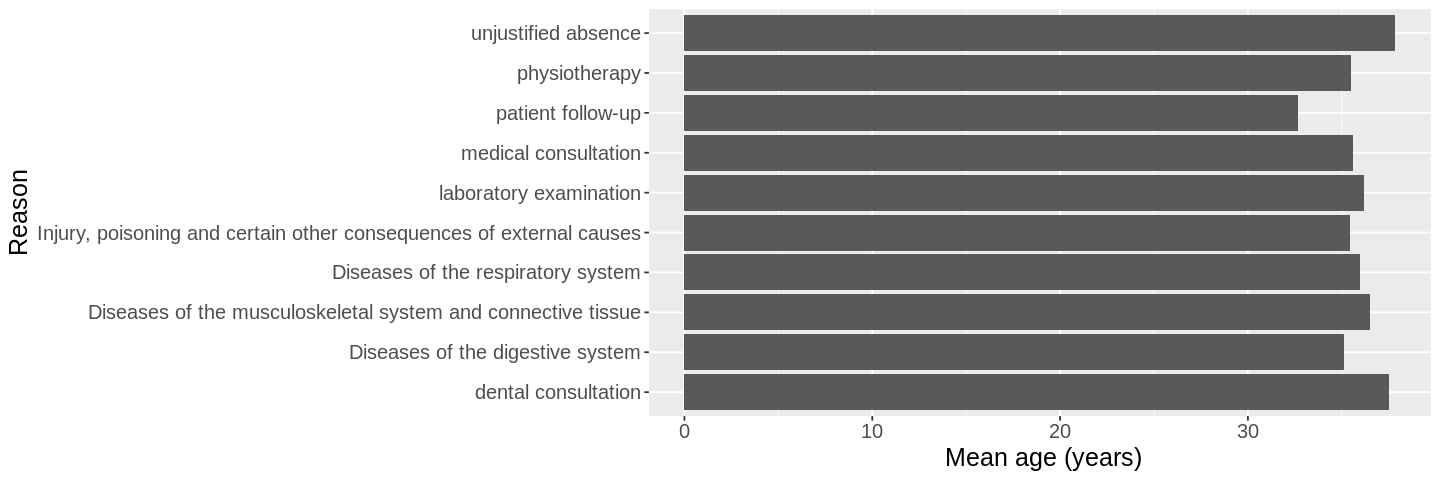

In [6]:

data_plot_age <- ggplot(data_means, aes(y = Reason, x = Mean.age)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = " Mean age (years)") +
    theme(text = element_text(size = 15))

data_plot_BMI <- ggplot(data_means, aes(y = Reason, x = Mean.BMI)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Mean body Mass Index") +
    theme(text = element_text(size = 15))

data_plot_distance <- ggplot(data_means, aes(y = Reason, x = Mean.distance.from.residence.to.work)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Mean distance from residence to work (km)") +
    theme(text = element_text(size = 15))

data_plot_time <- ggplot(data_means, aes(y = Reason, x = Mean.absent.hours)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(x = "Mean absent time (hours)") +
    theme(text = element_text(size = 15))


options(repr.plot.width = 12, repr.plot.height = 4)

data_plot_age

Figure 1: Top reasons for absence (y-axis) Vs. Mean age (x-axis)

Figure 1 demonstrates minimal variation in mean age for each reason of absence. All employees, aged 30 to 40, are absent for these 10 reasons. Therefore, age might be a bad predictor.

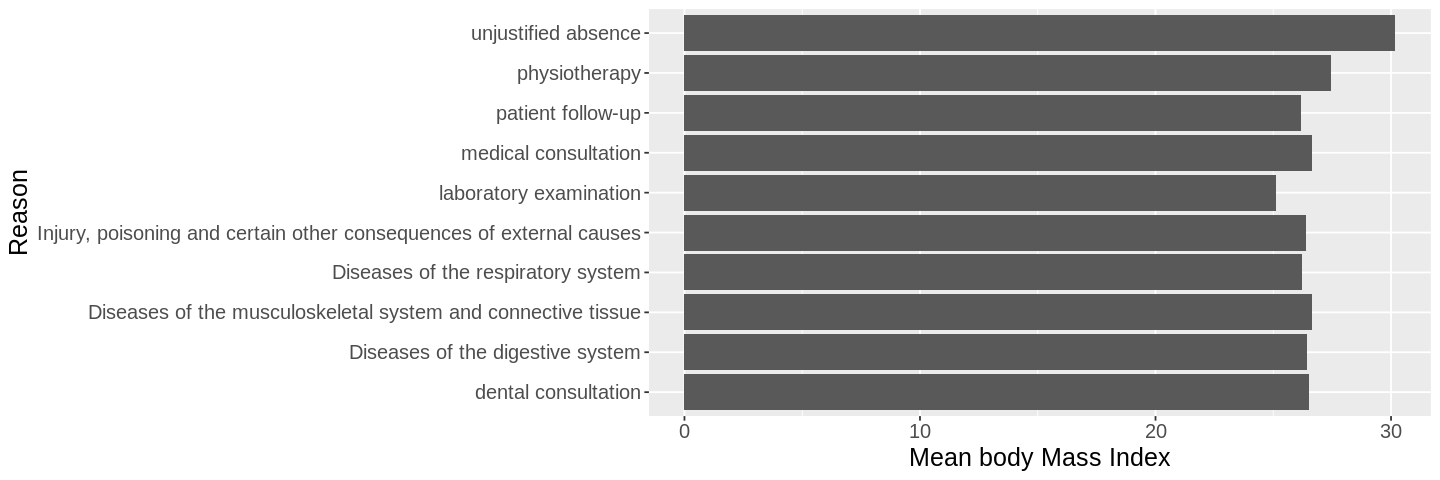

In [7]:
data_plot_BMI

Figure 2: Top reasons for absence (y-axis) Vs. Mean BMI (x-axis)

The mean BMI of employees is similar for the different reasons of absence indicated by the similar length of the bars. Thus, BMI is likely a bad predictor.

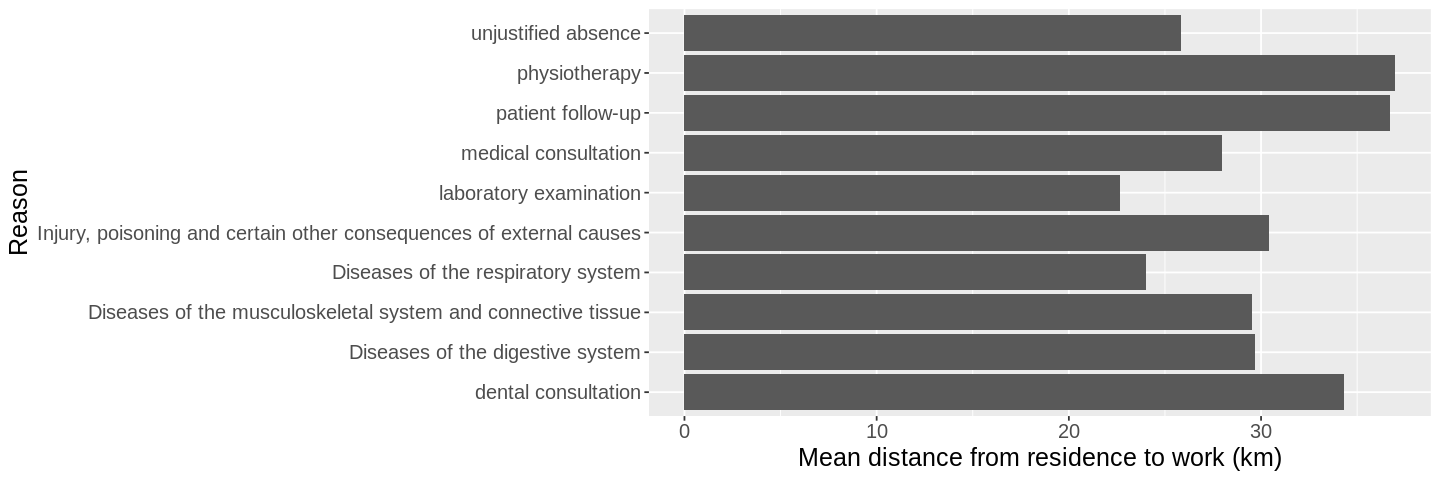

In [8]:
data_plot_distance

Figure 3: Top reasons for absence (y-axis) Vs. Mean distance from residence to work (x-axis)

The mean distances from residence to work differ for each reason of absence. For example, employees who live a longer distance (> 30 km away) from residence to work are absent probably due to dental consultation, physiotherapy and patient followup. Employees who live less than 30 km away can be absent for work due to other reasons. Hence, this might be a good predictor.

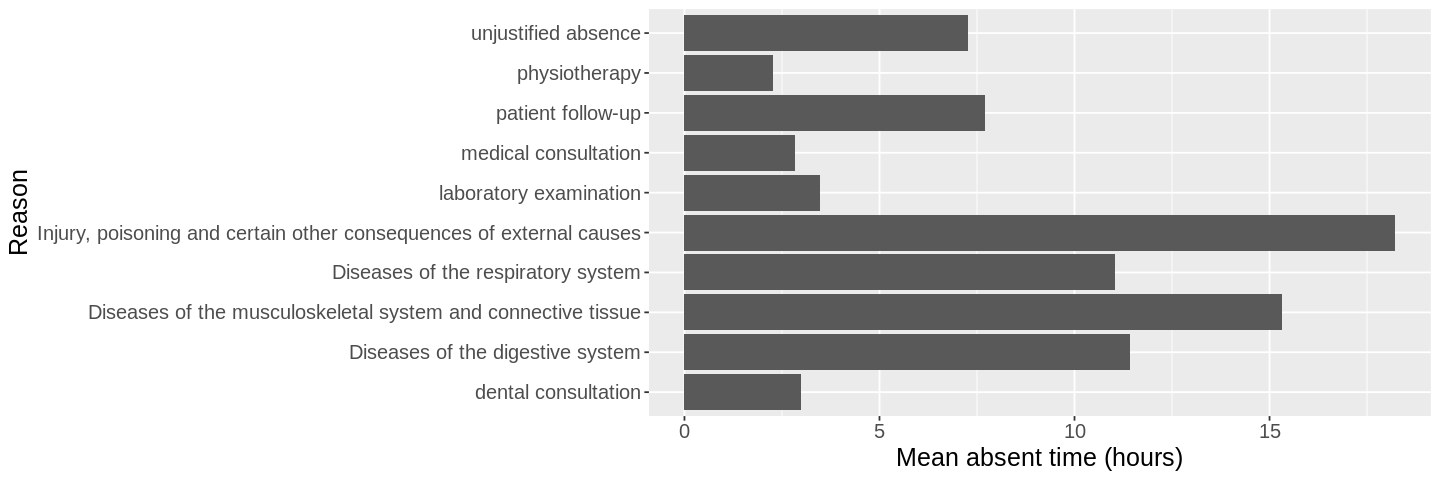

In [9]:
data_plot_time

Figure 4: Top reasons for absence (y-axis) Vs. Mean absent time (x-axis)

The mean number of absent hours differs significantly for different reasons of absence. For example, employees with “injury, poisoning and other consequences” have a mean absent hours greater than 15 hours, while those with “dental consultation” are absent for only 3 hours on average. This is reasonable as we would expect injured or poisoned individuals to be hospitalized for longer periods than those who are visiting the dentist. Thus, absent duration may be a good predictor. 

### Data analysis - Classification 

Altogether, based on our observations and analysis from figure 1 - 4, we choose distance from residence to work and the number of hours absent as the two predictors for the classification model.

We only set our seed to 1000 once here. We split the dataset into 70% training set and 30% testing set. 

In [10]:
set.seed(1000) 

data_split <- initial_split(data, prop = 0.7, strata = Reason.for.absence)  
data_train <- training(data_split)
data_test <- testing(data_split)

First we create a nearest_neighbors model specification, with neighbors = tune() and a recipe that uses all predictors. Then we perform a 5-fold cross validation to find the optimal k for the model. 

Note that step_upsample() is not used as it actually reduced accuracy. The reason is beyond the scope of the course.

In [11]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")
knn_tune

data_recipe <- recipe(Reason.for.absence ~ Absenteeism.time.in.hours + Distance.from.Residence.to.Work, data = data_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

data_recipe

data_vfold <- vfold_cv(data_train, v = 5, strata = Reason.for.absence)

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

We then add the recipe and model specification to a workflow, and use the tune_grid function to estimate the classifier accuracy for a range of K values from 1 to 50. Note that k_vals is chosen to be 1 to 50 so it is less computationally expensive. 

In [12]:
k_vals <- tibble(neighbors = seq(1:50))

knn_results <- workflow() |>
    add_recipe(data_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = data_vfold, grid = k_vals) |>
    collect_metrics()

We create a plot that compares the accuracies with different k.

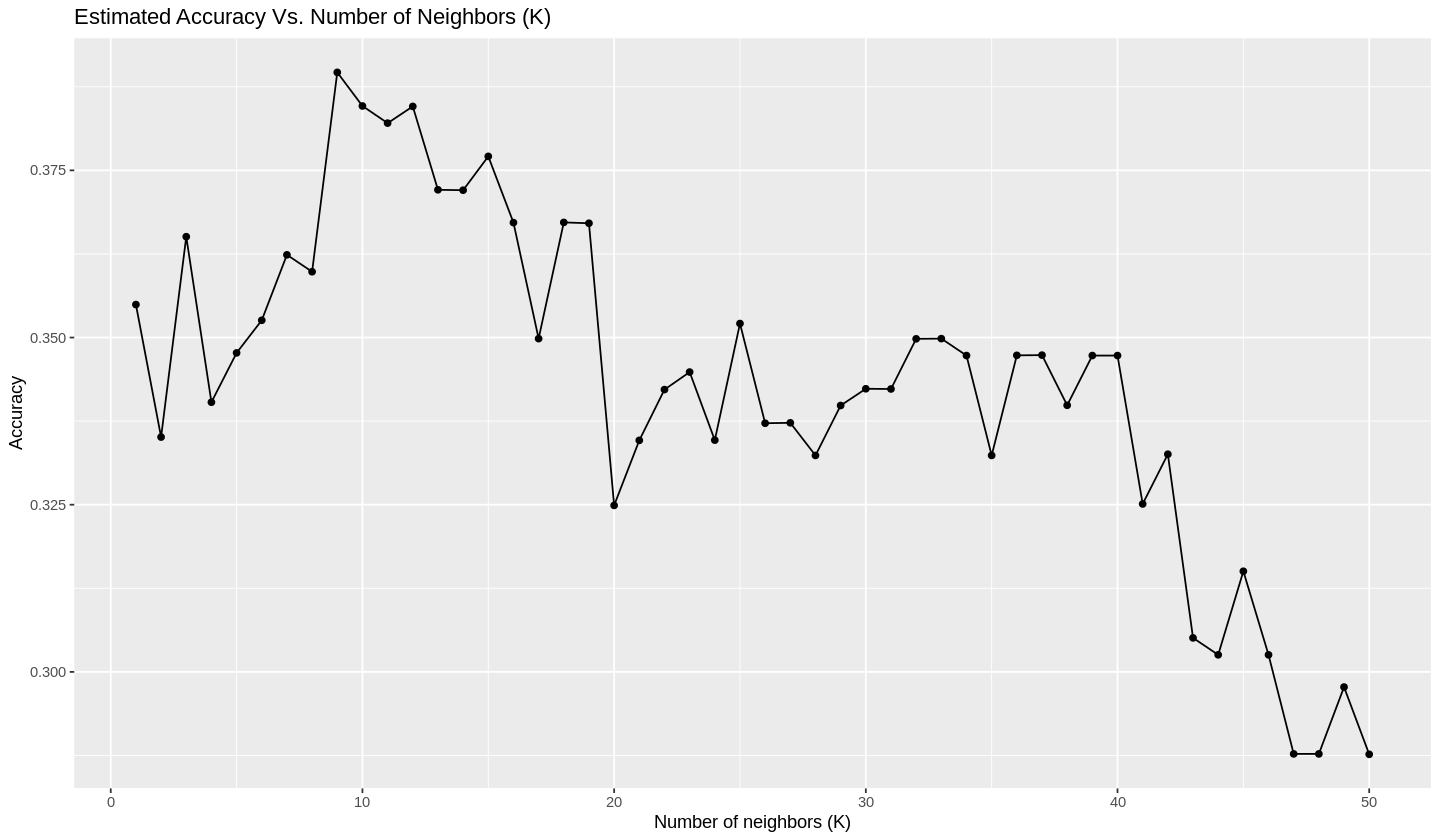

In [13]:
accuracies <- knn_results |>
    filter(.metric == "accuracy")

options(repr.plot.width = 12, repr.plot.height = 7)

knn_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of neighbors (K)", y = "Accuracy", title = "Estimated Accuracy Vs. Number of Neighbors (K)")


knn_plot

Figure 5: Estimated accuracy vs. number of neighbors (K) 

From the above graph, it appears that K = 12 might be the best for the model due to 3 reasons:

1. It has relatively high accuracy (close to 0.4) compared to other values of K. 
2. The accuracy doesn't change much around K=12. 
3. It is not computationally expensive. 

Although K = 9 results in the highest accuracy, it is not chosen as its neighbor K = 8 has a significantly lower accuracy. 

We then make a new model specification for the best parameter value (K = 12), and retrain the entire data set.

In [14]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
            set_engine("kknn") |>
            set_mode("classification")

data_fit <- workflow() |>
             add_recipe(data_recipe) |>
             add_model(knn_spec) |>
             fit(data = data_train)
data_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(12,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.560794
Best kernel: rectangular
Best k: 12

Then we evaluate and report the estimated accuracy of the classifier based on the testing data. We also evaluate the confusion matrix. 

In [15]:
data_test_predictions <- predict(data_fit, data_test) |>
                          bind_cols(data_test) 

data_prediction_accuracy <- data_test_predictions |>
                        metrics(truth = Reason.for.absence, estimate = .pred_class) |>
                        filter(.metric == "accuracy")

data_mat <- data_test_predictions |>
                conf_mat(truth = Reason.for.absence, estimate = .pred_class)

data_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4571429


Table 5: Accuracy table

Table 5 reports the accuracy of the model: 45.7%.

In [16]:
data_mat

          Truth
Prediction 10 11 13 19 22 23 25 26 27 28
        10  0  0  1  1  2  1  0  1  0  0
        11  0  0  0  0  0  0  0  0  0  0
        13  5  1  6 10  3  0  0  0  0  3
        19  1  0  0  2  1  0  0  2  0  0
        22  0  1  0  2  4  0  1  1  0  1
        23  0  2  3  1  0 31  4  3  7 13
        25  0  1  0  0  1  0  0  0  0  0
        26  1  0  1  1  1  0  0  1  0  0
        27  1  0  1  0  1  6  0  0 20  3
        28  0  0  0  0  0  6  0  0  0 16

Figure 6: Confusion matrix

Observing the confusion matrix, the classifier predicts 80 observations accurately. The top 3 reasons for absence classified correctly are 31 observations for reason 23 (medical consultation), 20 observations for reason 27(physiotheraphy) and 16 observations for reason 28 (dental consultation). 

The model falsely predicts reason 23 the most as it classifies 33 observations incorrectly as medical consultation (reason 23) when they are actually other reasons (11, 13 ...). This could be due to class imbalance since medical consultation is the most frequent reason (table 2). 

Finally, we create a scatter plot based on predictions, after standardizing predictors.

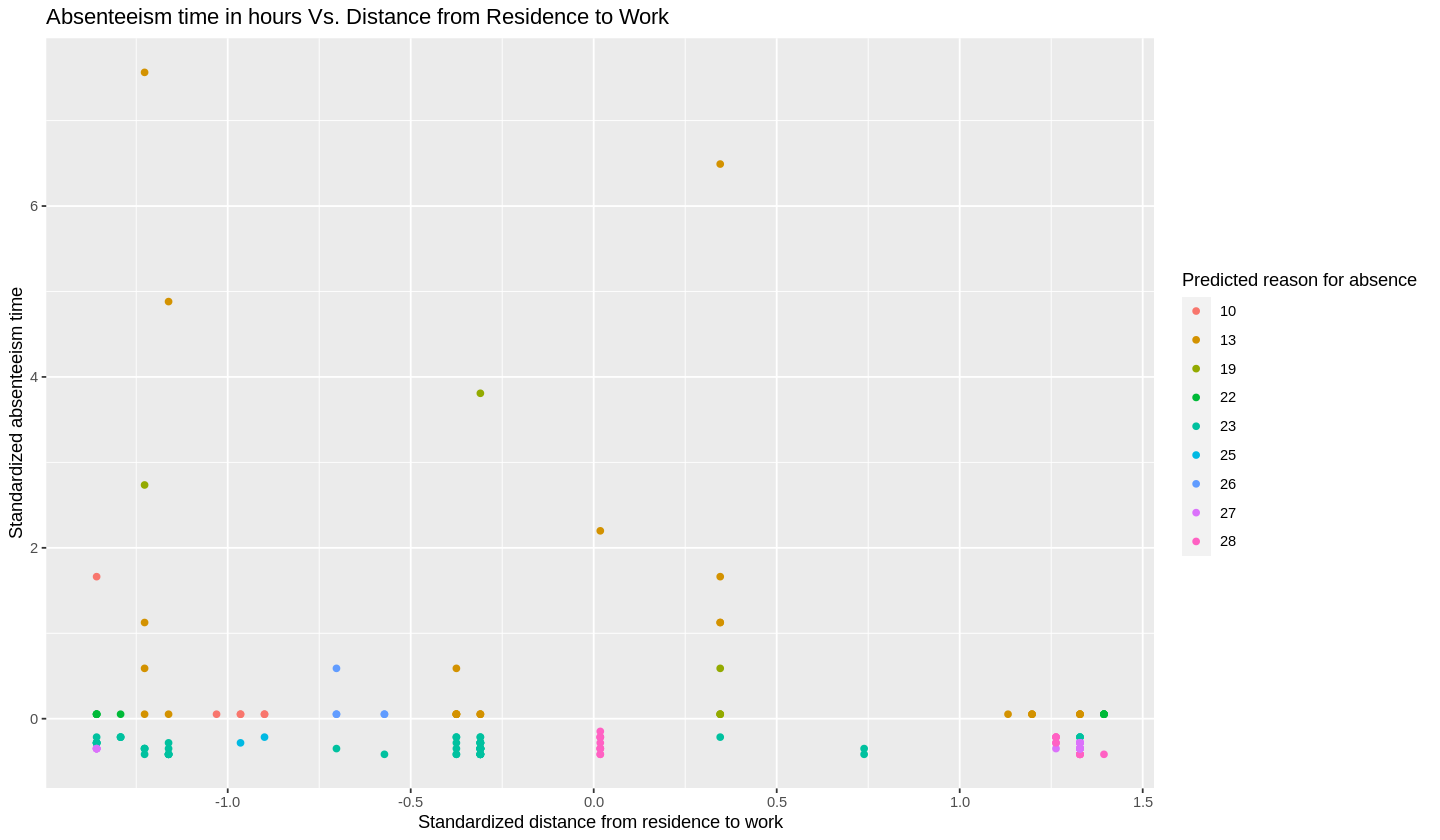

In [17]:
final_vis <- data_test_predictions |>
                ggplot(aes(x = scale(Distance.from.Residence.to.Work),
                           y = scale(Absenteeism.time.in.hours),
                          color = .pred_class)) +
                geom_point() +
                labs(x = "Standardized distance from residence to work", 
                     y = "Standardized absenteeism time", 
                     title = "Absenteeism time in hours Vs. Distance from Residence to Work",
                    color = "Predicted reason for absence")
final_vis

Figure 7: Scatter plot of standardized absent hours Vs. standardized distance from work with each reason of absence colored differently

Figure 7 shows only 9 different colors of the predicted absent reason. However, we have 10 classes to predict from, meaning one reason is never predicted, that is reason 11 (diseases in the digestive system). This is likely a class imbalance problem. Specifically, reason 11 is rare compared to other top 10 reasons, being the 9th most likely reason as presented in table 2. 

The colors of data points are scattered, showing no obvious clustered groups. Therefore, figure 7 appears messy. It is also difficult to differentiate between similar colors like purple and pink at the bottom right corner.

## Discussion 

The top 10 common reasons for absence we filtered are mostly medical reasons (i.e injuries, patient consultation ...). This is consistent with research, as respiratory disorders actually account for 50% of absence, and other illnesses account for 30% of absence (Feeny et al., 1998). 

We expected the means of all 4 potential predictors to vary for different absent reasons. However, this was only true for 2 of the 4 potential predictors: absent hours and distance between residence and work. It makes sense that people take longer time to recover from injuries and diseases than the time they visit the dentist, so on average, absent hours are longer for those reasons. BMI and age didn't vary much for every reason for absence, which shows people with different ages and BMI have similar reasons for absence. Therefore, we decide not to use them as predictors.

Using K = 12, the classfier has an accuracy of 45.7%. This is not optimal, as 45.7% is low compared to accuracies of previous models worked in the course. To improve the model, we may want to group different reasons into more general categories. This would decrease the number of predicted classes, and may help with the class imbalance by combining reasons of low frequency. Furthermore, with a larger dataset, such analysis can help employers improve productivity and employee wellness. 

Regarding class imbalance (observed from table 2) and improving the visualization (figure 7), more advanced methods or models may be used to address these problems.

Such findings can help employers understand the different reasons for their employee's absence at work, assisting them in planning and hiring processes. Employers can also use such analyses to set up effective employee wellness programs to increase productivity at work (Berry et al., 2010). In the future, further investigations may reveal the impacts of such programs on employee lives, and whether this classifier can be used on a wider population (in Brazil, or in other places of the world).

## References

Absenteeism. (2022.) *Merriam-Webster*. https://www.merriam-webster.com/dictionary/absenteeism

Berry, L. L., Mirabito, A. M., & Baun, W. B. (2010). What's the hard return on employee wellness programs? *Harvard Business Review, 88*(12), 104-142.

Bouville, G., Dello Russo, S., & Truxillo, D. (2018). The moderating role of age in the job characteristics–absenteeism relationship: A matter of occupational context? *Journal of Occupational and Organizational Psychology*, *91*(1), 57-83. https://doi.org/10.1111/joop.12188

Feeney, A., North, F., Head, J., Canner, R., & Marmot, M. (1998). Socioeconomic and sex differentials in reason for sickness absence from the whitehall II study. *Occupational and Environmental Medicine (London, England)*, *55*(2), 91-98. https://doi.org/10.1136/oem.55.2.91

Kenton, W. (2022, November 9). What is absenteeism? Definition, causes, and costs for business. *Investopedia.* Retrieved from https://www.investopedia.com/terms/a/absenteeism.asp


Ku, B., Phillips, K. E., & Fitzpatrick, J. J. (2019). The relationship of body mass index (BMI) to job performance, absenteeism and risk of eating disorder among hospital-based nurses. *Applied Nursing Research*, *49*, 77-79. https://doi.org/10.1016/j.apnr.2019.05.021

Lim, E., Davis, J., Choi, S. Y., & Chen, J. J. (2019). Effect of sociodemographics, Health‐Related problems, and family structure on chronic absenteeism among children. *The Journal of School Health*, *89*(4), 308-318. https://doi.org/10.1111/josh.12736

Martiniano, A., Ferreira, R. P., Sassi, R. J., & Affonso, C. (2012). Application of a neuro fuzzy network in prediction of absenteeism at work. In Information Systems and Technologies (CISTI), 7th Iberian Conference on (pp. 1-4). IEEE.

UCI Machine Learning Repository: Absenteeism at work data set. (n.d.). Retrieved from https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

Van Ommeren, J. N., & Gutiérrez-i-Puigarnau, E. (2011). Are workers with a long commute less productive? an empirical analysis of absenteeism. *Regional Science and Urban Economics*, *41*(1), 1-8. https://doi.org/10.1016/j.regsciurbeco.2010.07.005

Zammit, C., Liddicoat, H., Moonsie, I., & Makker, H. (2010). Obesity and respiratory diseases. *International journal of general medicine*, *3*, 335–343. https://doi.org/10.2147/IJGM.S11926

## Appendix

Column definitions for table 1:

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases

II Neoplasms

III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism

IV Endocrine, nutritional and metabolic diseases

V Mental and behavioural disorders

VI Diseases of the nervous system

VII Diseases of the eye and adnexa

VIII Diseases of the ear and mastoid process

IX Diseases of the circulatory system

X Diseases of the respiratory system

XI Diseases of the digestive system

XII Diseases of the skin and subcutaneous tissue

XIII Diseases of the musculoskeletal system and connective tissue

XIV Diseases of the genitourinary system

XV Pregnancy, childbirth and the puerperium

XVI Certain conditions originating in the perinatal period

XVII Congenital malformations, deformations and chromosomal abnormalities

XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified

XIX Injury, poisoning and certain other consequences of external causes

XX External causes of morbidity and mortality

XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory 
examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).

3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)